In [9]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt("data/ECGu.txt")  # Load the ECG data from the text file
print(data) # Print the ECG data
print(data.shape) # Print the number of rows and columns

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)


Shape: (6500, 3)
Durée (s): 6.499


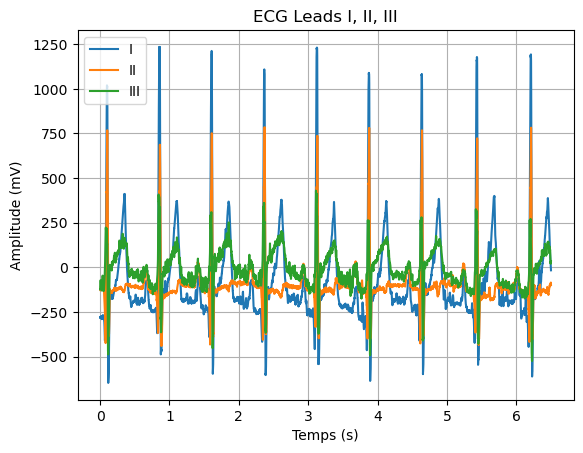

In [5]:
ecg_mV = data * (1024 / 1000)  # µV -> mV
# ou plus simplement, si tu considères directement : 1 unité = 1.024 mV
ecg_mV = data * 1.024

FS = 1000  # Hz
n_samples = ecg_mV.shape[0]
time_s = np.arange(n_samples) / FS
print("Shape:", ecg_mV.shape)   # (6500, 3)
print("Durée (s):", time_s[-1]) # ~6.5 secondes
# ...existing code...
plt.plot(time_s, ecg_mV[:,0], label="I")  # Dérivation I
plt.plot(time_s, ecg_mV[:,1], label="II")  # Dérivation II
plt.plot(time_s, ecg_mV[:,2], label="III")  # Dérivation III
plt.xlabel("Temps (s)")
plt.ylabel("Amplitude (mV)")
plt.title("ECG Leads I, II, III")
plt.legend()
plt.grid(True)
plt.show()
# ...existing code...

In [10]:
def plot_ecg_with_grid(time, ecg_data, leads=("I", "II", "III")):
    """Trace les dérivations ECG avec grille style papier millimétré."""
    fig, axes = plt.subplots(len(leads), 1, figsize=(12, 8), sharex=True)
    for i, lead in enumerate(leads):
        ax = axes[i]  # Axe pour la dérivation i
        y = ecg_data[:, i]  # Signal ECG pour la dérivation i
        ax.plot(time, y, color="blue", linewidth=1.0)

        # Grille type ECG
        ax.set_xticks(np.arange(0, time[-1], 0.2))  # Grandes divisions
        ax.set_xticks(np.arange(0, time[-1], 0.04), minor=True)  # Petites divisions

        # Axe Y (amplitude) dynamique
        ymin = np.min(y) - 0.1 * np.ptp(y)  # marge de 10% pour aérer
        ymax = np.max(y) + 0.1 * np.ptp(y)
        ax.set_ylim(ymin, ymax)  # Limites dynamiques
        ax.set_yticks(np.linspace(ymin, ymax, 7))  # Grandes divisions
        ax.set_yticks(np.linspace(ymin, ymax, 31), minor=True)  # Petites divisions
         
        ax.set_ylabel(f"Lead {lead}")

    axes[-1].set_xlabel("Time (s)")  # Label de l'axe X
    fig.suptitle("ECG avec grille", y=0.95)  # Titre du graphique
    plt.tight_layout()  # Ajustement de la mise en page
    plt.show()  # Affichage du graphique